<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/3.b.Unsupervised_K_Means_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
colnames=['sl', 'sw', 'pl', 'pw', 'cat']
df = pd.read_csv("/content/drive/MyDrive/csv/iris.csv", names=colnames, header=None)
df.head()

,sl,sw,pl,pw,cat
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'Pedal Length')

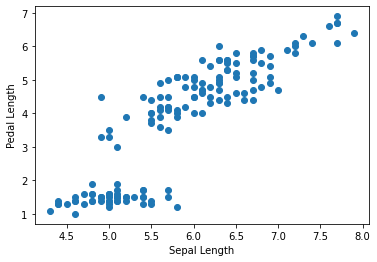

In [3]:
type(df.sl)

plt.scatter(df.sl,df.pl)
plt.xlabel('Sepal Length')
plt.ylabel('Pedal Length')

In [4]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['sl', 'pl']])
y_predicted
df['cluster']=y_predicted

In [ ]:
df.head()

,sl,sw,pl,pw,cat,pred,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [5]:

km.cluster_centers_

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

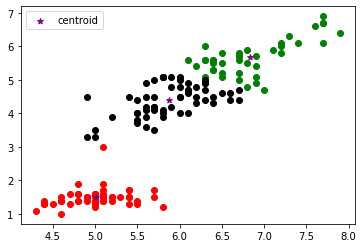

In [6]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sl,df1.pl,color='green')
plt.scatter(df2.sl,df2.pl,color='red')
plt.scatter(df3.sl,df3.pl, color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [12]:
wss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sl','pl']])
    wss.append(km.inertia_)

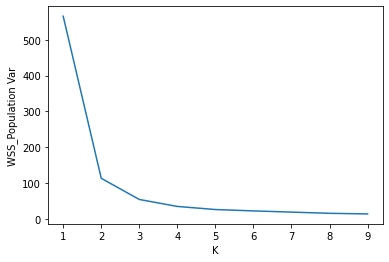

In [13]:

plt.xlabel('K')
plt.ylabel('WSS_Population Var')
plt.plot(k_rng, wss)

In [14]:
wss

[566.0320666666667,
 112.96262731481481,
 53.801351193126536,
 34.31442077922078,
 25.63146450956451,
 21.83897885604408,
 18.449512673317024,
 15.083906926406929,
 13.39118197925263]

## The best way to cluster these data points seemed to be k=3.  since we knew from the beginning that there are three kinds of iris. this fits well with the initial assumption

In [ ]:
df

In [35]:
df6 = df['sl']

In [36]:
df7 =df['pl']

In [39]:
df8=df6 +df7

In [46]:
df_Short=pd.concat([df6, df7], axis=1 )

In [73]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i).fit(df_Short).labels_
    print (metrics.silhouette_score(df_Short,labels, metric="euclidean"))

0.7096825580716465
0.5890612473759282
0.5645625259696128
0.5577964978244648
0.42743705985528424
0.39925213656313946
0.42503952890756175
0.436780303194279


In [74]:
labels

array([6, 6, 4, 4, 6, 1, 4, 6, 4, 6, 1, 6, 4, 4, 1, 1, 1, 6, 1, 6, 1, 6,
       4, 6, 6, 6, 6, 6, 6, 4, 6, 1, 6, 1, 6, 6, 1, 6, 4, 6, 6, 4, 4, 6,
       6, 4, 6, 4, 1, 6, 8, 8, 8, 2, 8, 2, 5, 7, 8, 2, 7, 2, 2, 5, 2, 8,
       2, 2, 5, 2, 5, 2, 5, 5, 8, 8, 8, 8, 5, 2, 2, 2, 2, 5, 2, 5, 8, 8,
       2, 2, 2, 5, 2, 7, 2, 2, 2, 5, 7, 2, 3, 5, 0, 3, 3, 0, 2, 0, 3, 0,
       8, 3, 3, 5, 5, 3, 3, 0, 0, 5, 3, 5, 0, 5, 3, 0, 5, 5, 3, 0, 0, 0,
       3, 5, 3, 0, 3, 3, 5, 3, 3, 8, 5, 3, 3, 3, 5, 3, 3, 5], dtype=int32)

# The silhoute method seems not to agree with the analysis.  the graph seems to support this analysis as well.
